In [4]:
from readtmx import readtmx
omega=0.05
res=readtmx('AdamM_files-17Jan08/triples.tmx',numTJ=40188)

print res[0].shape

print res[1].shape

from scipy.sparse import csr_matrix
import numpy as np

data=np.swapaxes(res[1],1,3).ravel()
row_ind=np.tile(np.arange(res[0].shape[0]*3),(36*3*3,1)).T.ravel()

tmp=np.swapaxes(np.swapaxes(np.tile(res[0],(3,3,1,1,1)),0,2),2,4)
tmp[:,:,:,:,1]+=(36*9**4)
tmp[:,:,:,:,2]+=(2*36*9**4)
col_ind=tmp.ravel()-1
del tmp

A=csr_matrix((data,(row_ind,col_ind)),shape=(res[0].shape[0]*3,3*36*9**4))
del data
del row_ind
del col_ind

xic=np.loadtxt('/home/heliu/Dropbox/CO/project/AdamM_files-17Jan08/cap_vec.res')

X=xic.T.ravel().reshape((-1,1))



(40188, 3, 36)
(40188, 3, 36, 3, 3)


In [5]:
num_iter=300
for ii in range(num_iter):
    d=A*X
    newX=X-omega/36.0/9.0*A.transpose()*d
    X=newX*(np.sum(xic**2)/np.sum(newX**2))**0.5

In [6]:
# test on iteration 300 from Adam code
normN = np.loadtxt('/home/heliu/Dropbox/CO/project/AdamM_files-17Jan08/cap_vec.res')
print(normN.shape)
reshapeX = np.hstack([X[:normN.shape[0]],X[normN.shape[0]:2*normN.shape[0]],X[2*normN.shape[0]:]])
print(reshapeX.shape)
energy = np.sum(normN*reshapeX,axis=1)
print(energy.shape)
capVec = np.loadtxt('/home/heliu/Dropbox/CO/project/iter300/cap_vec.res')
energyAdam = np.sum(normN*capVec,axis=1)
print(energyAdam)
print(energy)

(236196, 3)
(236196, 3)
(236196,)
[ 0.75194183  0.64556022  1.1947587  ...,  0.69503057  0.75132625
  0.47892772]
[ 1.30085654  0.6752242   1.19273397 ...,  0.71444184  0.73038434
  1.84455964]


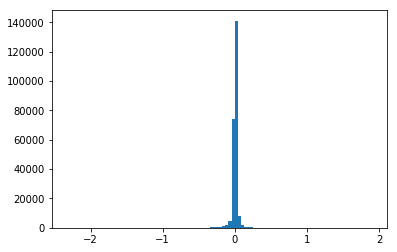

In [13]:
import matplotlib.pyplot as plt
error = energy-energyAdam
plt.hist(error,bins=100)
plt.show()